# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

> Le modèle RFM est une stratégie marketing éprouvée basée sur la segmentation du comportement des clients. Il regroupe les clients en fonction de leur historique d’achat - à quelle date, avec quelle fréquence et de quelle valeur ont-ils acheté.

> RFM représente une stratégie de compréhension et d’analyse de vos clients basée sur trois facteurs : **la récence, la fréquence et la valeur monétaire**.

❓ Can you summarize what each metric measures in one sentence?

> * La **récence** mesure le temps qui s’est passé depuis le dernier achat.
> * La **fréquence** mesure la fréquence des achats sur une période de référence donnée.
> * Le **montant** mesure la somme des achats cumulés sur une période.

❓ What data / or type of data do you need for each metric ? 

> * Récence : order_purchase_timestamp
> * Fréquence : customer_unique_id
> * Montant : payment_value

Let's explore the dataset!

# Exploratory Data Analysis

Import librairies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset and start an Exploratory Data Analysis

In [4]:
df = pd.read_csv('C:/Users/zaome/Documents/Projet_analyse_clients/Projet_e_commerce/db_customers.csv')
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [5]:
df.shape

(105383, 13)

In [6]:
df['order_status']

0         delivered
1         delivered
2         delivered
3         delivered
4         delivered
            ...    
105378    delivered
105379    delivered
105380    delivered
105381    delivered
105382    delivered
Name: order_status, Length: 105383, dtype: object

Informations Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       105383 non-null  object 
 1   order_status                   105383 non-null  object 
 2   order_purchase_timestamp       105383 non-null  object 
 3   order_delivered_customer_date  102224 non-null  object 
 4   payment_type                   105382 non-null  object 
 5   payment_installments           105382 non-null  float64
 6   payment_value                  105382 non-null  float64
 7   review_score                   105383 non-null  int64  
 8   customer_unique_id             105383 non-null  object 
 9   customer_zip_code_prefix       105383 non-null  int64  
 10  customer_city                  105383 non-null  object 
 11  customer_state                 105383 non-null  object 
 12  product_category_name_english 

❓ Which features should be formated in datetime ? 
Convert them

Format Date

In [8]:
date_columns = ['order_purchase_timestamp','order_delivered_customer_date']

for col in date_columns:    
    df[col] = pd.to_datetime(df[col])   
df.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                              int64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
product_category_name_english            object
dtype: object

In [9]:
df[date_columns].describe()

<ipython-input-9-88cffcca3793>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_columns].describe()
<ipython-input-9-88cffcca3793>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_columns].describe()


,order_purchase_timestamp,order_delivered_customer_date
count,105383,102224
unique,98875,95664
top,2017-08-08 20:26:31,2017-08-14 12:46:18
freq,42,42
first,2016-09-04 21:15:19,2016-10-11 13:46:32
last,2018-10-17 17:30:18,2018-10-17 13:22:46


> - first : 2016-10-11
> - last :  2018-10-17 

❓ Which features are Categorical ? List the unique values on these features.

In [10]:
categ_columns = df[['order_status', 'payment_type','customer_city', 'customer_state','product_category_name_english']]
print(categ_columns)

       order_status payment_type        customer_city customer_state  \
0         delivered  credit_card            sao paulo             SP   
1         delivered      voucher            sao paulo             SP   
2         delivered      voucher            sao paulo             SP   
3         delivered       boleto            barreiras             BA   
4         delivered  credit_card           vianopolis             GO   
...             ...          ...                  ...            ...   
105378    delivered  credit_card  sao jose dos campos             SP   
105379    delivered  credit_card         praia grande             SP   
105380    delivered  credit_card          nova vicosa             BA   
105381    delivered  credit_card              japuiba             RJ   
105382    delivered   debit_card                 lapa             PR   

       product_category_name_english  
0                         housewares  
1                         housewares  
2                 

❓ Check for missing values. What do you notice ? 


In [11]:
df.isna().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

- order_delivered_customer_date : 3159
- product_category_name_english : 2410
- payment_type : 1
- payment_installments : 1
- payment_value : 1

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [12]:
#df = df.query('order_status == "delivered"')

In [13]:
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ What are the proportions of each `order_status` ? 

In [14]:
df['order_status'].value_counts(normalize=True)*100

delivered      97.003312
shipped         1.119725
canceled        0.634827
unavailable     0.617747
invoiced        0.313143
processing      0.304603
created         0.004745
approved        0.001898
Name: order_status, dtype: float64

Affichage en %

In [15]:
df['order_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

delivered      97.0%
shipped         1.1%
canceled        0.6%
unavailable     0.6%
invoiced        0.3%
processing      0.3%
created         0.0%
approved        0.0%
Name: order_status, dtype: object

❓ Which `order_status` do you think should be removed from the analysis

> * On supprime : canceled, unavailable, invoiced, processing, created, approved
> * On garge : delivered et shipped (représente 98.1% des données)

❓ What feature would you choose in the e-commerce dataset provided? 

> payment_value

❓ What method would you use to group the data? 

> group_by

❓ What feature would you use to group the data? 

> customer_unique_id

❓ Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [16]:
orders = df.groupby(['customer_unique_id']).agg({'payment_value': lambda x: x.sum()}).reset_index()
orders.head()

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


Groupby

In [17]:
orders = df.groupby(['order_purchase_timestamp','order_status','payment_value']).agg({'customer_unique_id': lambda x: x.sum()}).reset_index()
orders.head()

,order_purchase_timestamp,order_status,payment_value,customer_unique_id
0,2016-09-04 21:15:19,shipped,136.23,b7d76e111c89f7ebf14761390f0f7d17
1,2016-09-05 00:15:34,canceled,75.06,4854e9b3feff728c13ee5fc7d1547e92
2,2016-09-13 15:24:19,canceled,40.95,009b0127b727ab0ba422f6d9604487c7
3,2016-10-02 22:07:52,canceled,109.34,0eb1ee9dba87f5b36b4613a65074337c
4,2016-10-03 09:44:50,delivered,45.46,32ea3bdedab835c3aa6cb68ce66565ef


In [18]:
orders.shape

(103230, 4)

Drop

In [19]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

Recence

In [20]:
from datetime import datetime 
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
date_format = "%m/%d/%Y"
a = df['order_purchase_timestamp']
b = max(df['order_purchase_timestamp'])
df['recence'] = b-a
df['recence'] = df['recence'].astype('timedelta64[D]')
recence = df.groupby('customer_unique_id')['recence'].min()
recence = pd.DataFrame(recence).reset_index()

recence

,customer_unique_id,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0
2,0000f46a3911fa3c0805444483337064,541.0
3,0000f6ccb0745a6a4b88665a16c9f078,325.0
4,0004aac84e0df4da2b147fca70cf8255,292.0
...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,451.0
94395,fffea47cd6d3cc0a88bd621562a9d061,266.0
94396,ffff371b4d645b6ecea244b27531430a,572.0
94397,ffff5962728ec6157033ef9805bacc48,123.0


Montant et Frequence

In [21]:
orders = df.groupby(['customer_unique_id', 'order_purchase_timestamp']).agg(
#   Recency = pd.NamedAgg(column='order_purchase_timestamp', aggfunc= lambda x: x - max(),
    Frequency = pd.NamedAgg(column='payment_value', aggfunc='count'),
    Monetary = pd.NamedAgg(column='payment_value', aggfunc=sum)
).reset_index()
# orders.head()
orders

,customer_unique_id,order_purchase_timestamp,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89
...,...,...,...,...
97300,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,2067.42
97301,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,84.58
97302,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,112.46
97303,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,133.69


In [22]:
# orders = df.groupby(['order_purchase_timestamp','customer_unique_id']).agg(
# Frequence = ('payment_value', 'count'),
# Montant = ('payment_value', 'sum'))
# orders

Merge 

In [23]:
rfm = recence.merge(orders, left_on = "customer_unique_id", right_on = "customer_unique_id", how = 'left')
rfm

,customer_unique_id,recence,order_purchase_timestamp,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,541.0,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292.0,2017-11-14 19:45:42,1,196.89
...,...,...,...,...,...
97300,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,2017-06-08 21:00:36,1,2067.42
97301,fffea47cd6d3cc0a88bd621562a9d061,266.0,2017-12-10 20:07:56,1,84.58
97302,ffff371b4d645b6ecea244b27531430a,572.0,2017-02-07 15:49:16,1,112.46
97303,ffff5962728ec6157033ef9805bacc48,123.0,2018-05-02 15:17:41,1,133.69


❓ What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

> order_purchase_timestamp

❓ So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

In [24]:
orders.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'Frequency',
       'Monetary'],
      dtype='object')

❓ What is the date of the least purchase?

In [25]:
from datetime import timedelta

In [26]:
date1 = orders['order_purchase_timestamp'].min()
date1

Timestamp('2016-09-04 21:15:19')

❓ What is the date of the most recent purchase?

In [27]:
date2 = orders['order_purchase_timestamp'].max()
date2

Timestamp('2018-09-03 09:06:57')

❓ How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [28]:
recence

,customer_unique_id,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0
2,0000f46a3911fa3c0805444483337064,541.0
3,0000f6ccb0745a6a4b88665a16c9f078,325.0
4,0004aac84e0df4da2b147fca70cf8255,292.0
...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,451.0
94395,fffea47cd6d3cc0a88bd621562a9d061,266.0
94396,ffff371b4d645b6ecea244b27531430a,572.0
94397,ffff5962728ec6157033ef9805bacc48,123.0


❓ Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [29]:
diff = date2 - (date1 + timedelta(days=1))
diff

Timedelta('727 days 11:51:38')

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓ Which column is the R? The F? The M?

In [30]:
rfm

,customer_unique_id,recence,order_purchase_timestamp,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,541.0,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292.0,2017-11-14 19:45:42,1,196.89
...,...,...,...,...,...
97300,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,2017-06-08 21:00:36,1,2067.42
97301,fffea47cd6d3cc0a88bd621562a9d061,266.0,2017-12-10 20:07:56,1,84.58
97302,ffff371b4d645b6ecea244b27531430a,572.0,2017-02-07 15:49:16,1,112.46
97303,ffff5962728ec6157033ef9805bacc48,123.0,2018-05-02 15:17:41,1,133.69


❓ Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [31]:
rfm.describe()

,recence,Frequency,Monetary
count,97305.000000,97305.000000,97305.000000
mean,241.098916,1.062679,163.225367
std,152.538679,0.444192,225.229166
min,0.000000,0.000000,0.000000
25%,118.000000,1.000000,62.230000
50%,222.000000,1.000000,106.060000
75%,349.000000,1.000000,178.560000
max,728.000000,42.000000,13664.080000


RFM score

In [32]:
rfm['R_score'] = pd.qcut(rfm['recence'], 3, labels=[1, 2, 3]).astype(str)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3]).astype(str)
rfm['F_score'] = rfm['Frequency'].apply(lambda x: '1' if x==1 else '2')

rfm['RFM_score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

In [33]:
rfm.head()

,customer_unique_id,recence,order_purchase_timestamp,Frequency,Monetary,R_score,M_score,F_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,2018-05-10 10:56:27,1,141.90,1,2,1,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,2018-05-07 11:11:27,1,27.19,1,1,1,111
2,0000f46a3911fa3c0805444483337064,541.0,2017-03-10 21:05:03,1,86.22,3,2,1,312
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,2017-10-12 20:29:41,1,43.62,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,292.0,2017-11-14 19:45:42,1,196.89,2,3,1,213


In [118]:
rfm['recence'].value_counts()

282.0    1067
283.0     434
281.0     420
280.0     396
118.0     380
         ... 
601.0       4
603.0       3
0.0         2
717.0       1
728.0       1
Name: recence, Length: 613, dtype: int64

Méthode avec Quintiles

In [110]:
###Calculating quantile values
quintiles = rfm[['recence', 'Frequency', 'Monetary']].quantile([.2, .25, .3, .35, .4, .5, .6, .7, .8, .9]).to_dict()
###Benchmark to give score for recency indicator
def r_score(r):
    if r < quintiles['recence'][.2]:
        return 3 
    elif r < quintiles['recence'][.8]:
        return 2
    else: 
        return 1
###Benchmark to give score for frequency & monetary indicator.   
def f_score(f): 
    if f > quintiles['Frequency'][.8]:
        return 3
    elif f > quintiles['Frequency'][.2]: 
        return 2
    else: 
        return 1

def m_score(m): 
    if m > quintiles['Monetary'][.8]:
        return 3
    elif m > quintiles['Monetary'][.2]: 
        return 2
    else: 
        return 1

In [140]:
rfm2 = rfm.copy()
rfm2['r_score'] = rfm2.recence.apply(lambda x: r_score(x))
rfm2['f_score'] = rfm2.Frequency.apply(lambda x: f_score(x))
rfm2['m_score'] = rfm2.Monetary.apply(lambda x: m_score(x))
rfm2['rfm'] = rfm2['r_score'].map(str)+rfm2['f_score'].map(str) + rfm2['m_score'].map(str)
rfm2

,customer_unique_id,recence,order_purchase_timestamp,Frequency,Monetary,R_score,M_score,F_score,RFM_score,r_score,f_score,m_score,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,2018-05-10 10:56:27,1,141.90,1,2,1,112,2,1,2,212
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,2018-05-07 11:11:27,1,27.19,1,1,1,111,2,1,1,211
2,0000f46a3911fa3c0805444483337064,541.0,2017-03-10 21:05:03,1,86.22,3,2,1,312,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,2017-10-12 20:29:41,1,43.62,3,1,1,311,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292.0,2017-11-14 19:45:42,1,196.89,2,3,1,213,2,1,2,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97300,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,2017-06-08 21:00:36,1,2067.42,3,3,1,313,1,1,3,113
97301,fffea47cd6d3cc0a88bd621562a9d061,266.0,2017-12-10 20:07:56,1,84.58,2,2,1,212,2,1,2,212
97302,ffff371b4d645b6ecea244b27531430a,572.0,2017-02-07 15:49:16,1,112.46,3,2,1,312,1,1,2,112
97303,ffff5962728ec6157033ef9805bacc48,123.0,2018-05-02 15:17:41,1,133.69,1,2,1,112,2,1,2,212


In [141]:
rfm['rfm_group'] = rfm['R_score'].str.cat(rfm['F_score']).str.cat(rfm['M_score'])

In [121]:
print(rfm2['r_score'].value_counts())

print(rfm2['f_score'].value_counts())

print(rfm2['m_score'].value_counts())

2    58463
1    19490
3    19352
Name: r_score, dtype: int64
1    93022
3     4283
Name: f_score, dtype: int64
2    58385
1    19460
3    19460
Name: m_score, dtype: int64


Visualisations

<AxesSubplot:xlabel='r_score'>

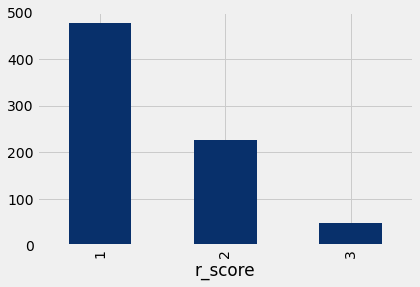

In [133]:
rfm2.groupby('r_score').agg('recence').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='f_score'>

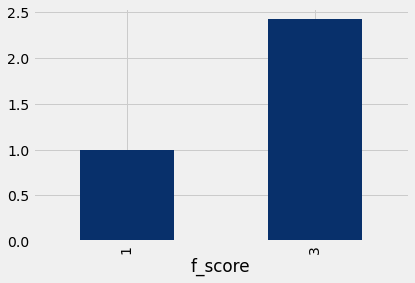

In [134]:
rfm2.groupby('f_score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='m_score'>

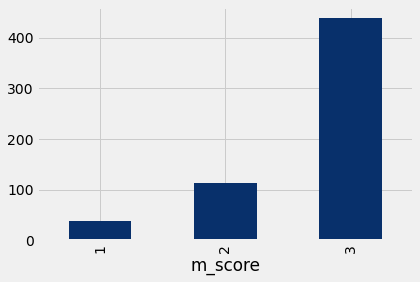

In [132]:
rfm2.groupby('m_score').agg('Monetary').mean().plot(kind='bar', colormap='Blues_r')

❓ Now that you have clusters for each category, explain the different buying behaviors

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


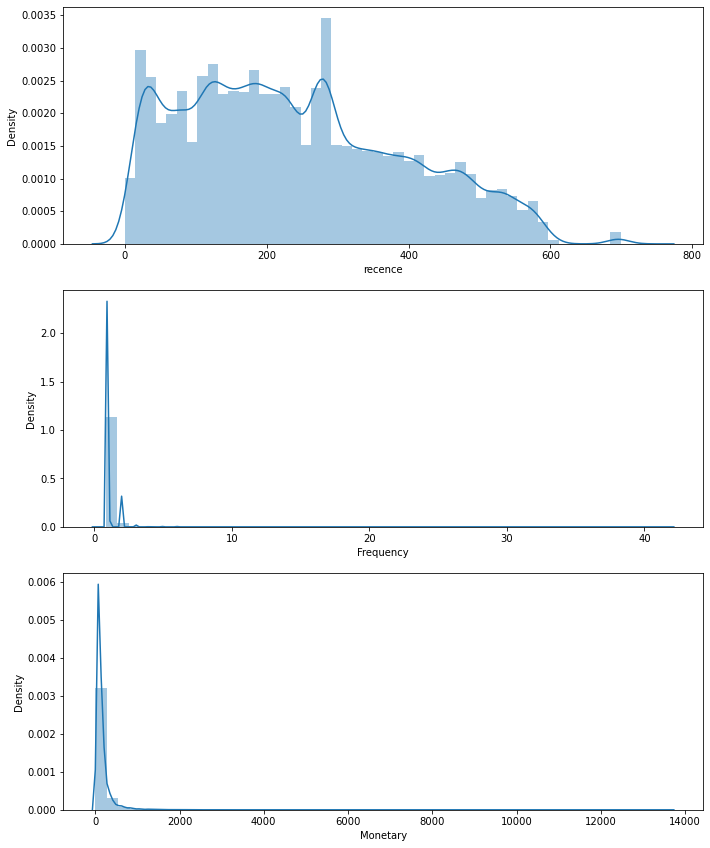

In [130]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.recence, label = 'recence')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

# Working with cohorts

❓What is a cohort? 

> L’analyse de cohorte est un type d’analyse comportementale dans lequel vous regroupez vos utilisateurs en fonction de leurs traits communs pour mieux suivre et comprendre leurs actions. 

❓Why is it interesting to analyse cohorts ? 

> L’analyse de cohorte vous permet de poser des questions plus spécifiques et ciblées et de prendre des décisions éclairées sur les produits qui rédiront le taux de désabonnement et augmenteront considérablement les revenus. 

❓What data (already existing in the original dataset) do we need to build a cohort? 

> - order_purchase_timestamp
> - customer_unique_id
> - order_id

❓Build a new df with just these 3 features

In [66]:
df_c = df[["order_purchase_timestamp", "customer_unique_id", "order_id"]]
df_c

,order_purchase_timestamp,customer_unique_id,order_id
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7
1,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7
2,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7
3,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451
4,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d
...,...,...,...
105378,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c
105379,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8
105380,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab
105381,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62


❓Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [126]:
m = pd.DatetimeIndex(df_c["order_purchase_timestamp"])
df_c['order_months'] = m.to_period("M")

df_c['order_months']

0        2017-10
14       2018-06
15       2018-01
43       2018-06
45       2017-05
          ...   
97443    2018-02
97455    2018-05
97491    2018-03
97563    2017-10
97571    2018-05
Name: order_months, Length: 6047, dtype: period[M]

Affichage du tableau avec la feature order_months

In [128]:
df_c

,customer_unique_id,order_id,order_purchase_timestamp,order_month,na,cohort,order_months
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,2.0,2017-09,2017-10
14,ccafc1c3f270410521c3c6f3b249870f,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,2018-06,2.0,2016-10,2018-06
15,6e26bbeaa107ec34112c64e1ee31c0f5,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43,2018-01,2.0,2017-07,2018-01
43,08fb46d35bb3ab4037202c23592d1259,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,2018-06,2.0,2018-06,2018-06
45,c2551ea089b7ebbc67a2ea8757152514,d17dc4a904426827ca80f2ccb3a6be56,2017-05-14 20:28:25,2017-05,2.0,2017-05,2017-05
...,...,...,...,...,...,...,...
97443,e2492e4188991b6276a4a62a287a5451,a96157730ca02d9de4c4e4ac2fc49f2c,2018-02-06 08:38:54,2018-02,3.0,2018-02,2018-02
97455,62b8761192c86f4ead06f4a433096a2b,58edf3f5f282ab91e0f6a6f2b85af02a,2018-05-07 09:01:58,2018-05,2.0,2018-05,2018-05
97491,dca9a13536adcef18c6c5859487347b1,bfecb4ee6ab98bff69307aab578db48a,2018-03-17 12:52:37,2018-03,2.0,2017-12,2018-03
97563,39fff7cb5873a7116b02234bd1e6c6dc,1b4a0e6b19d0034b531655b41ea89623,2017-10-02 08:45:35,2017-10,2.0,2017-10,2017-10


❓Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [68]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_c = df_c[df_c['na'].notna()]

In [69]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

,order_purchase_timestamp,customer_unique_id,order_id,order_months,na,cohort
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
1,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
2,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
10,2017-07-29 11:55:02,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
11,2017-07-29 11:55:02,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
...,...,...,...,...,...,...
103389,2018-05-12 13:42:24,9e4accf95024aa6565ca1efcadb96752,19dba6d1e58b04e7fc820558a38ea398,2018-05,2.0,2017-09
103395,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
103396,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
103397,2017-01-27 00:30:03,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,2017-01,2.0,2017-01


❓Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [70]:
from operator import attrgetter

In [75]:
df_cohort = df_c.groupby(['cohort', 'order_months']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort

,cohort,order_months,n_customers
0,2016-10,2016-10,24
1,2016-10,2017-04,1
2,2016-10,2017-07,1
3,2016-10,2017-09,1
4,2016-10,2017-11,1
...,...,...,...
214,2018-06,2018-08,16
215,2018-07,2018-07,295
216,2018-07,2018-08,31
217,2018-08,2018-08,229


❓Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [76]:
df_cohort['period_number'] = (df_c.order_months - df_c.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_months,n_customers,period_number
0,2016-10,2016-10,24,1.0
1,2016-10,2017-04,1,1.0
2,2016-10,2017-07,1,1.0
3,2016-10,2017-09,1,NaN
4,2016-10,2017-11,1,NaN
...,...,...,...,...
214,2018-06,2018-08,16,NaN
215,2018-07,2018-07,295,NaN
216,2018-07,2018-08,31,NaN
217,2018-08,2018-08,229,NaN


❓Explore a cohort (for example 2017-01) and try to understand what it shows

In [80]:
df_cohort[df_cohort["cohort"] == '2017-01']

,cohort,order_months,n_customers,period_number
11,2017-01,2017-01,77,0.0
12,2017-01,2017-02,3,NaN
13,2017-01,2017-03,2,NaN
14,2017-01,2017-04,1,NaN
15,2017-01,2017-05,3,NaN
16,2017-01,2017-06,1,NaN
17,2017-01,2017-07,3,20.0
18,2017-01,2017-08,1,6.0
19,2017-01,2017-09,1,NaN
20,2017-01,2017-11,3,NaN


❓Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [95]:
cohort_pivot = df_cohort.pivot_table(index ='cohort', columns ='period_number', values ='n_customers')
cohort_pivot

period_number,0.0,1.0,5.0,6.0,20.0
cohort,,,,,
2016-10,NaN,8.666667,NaN,NaN,NaN
2016-12,1.000000,NaN,NaN,NaN,NaN
2017-01,21.500000,NaN,NaN,1.0,3.0
2017-03,9.666667,NaN,NaN,NaN,NaN
2017-04,5.500000,1.000000,NaN,NaN,NaN
2017-05,59.285714,NaN,NaN,NaN,NaN
2017-06,9.000000,NaN,NaN,NaN,NaN
2017-07,10.000000,NaN,NaN,NaN,NaN
2017-08,194.500000,NaN,NaN,NaN,NaN


❓Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [96]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

retention_matrix

period_number,0.0,1.0,5.0,6.0,20.0
cohort,,,,,
2016-10,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,NaN,NaN,NaN,NaN
2017-01,1.0,NaN,NaN,0.046512,0.139535
2017-03,1.0,NaN,NaN,NaN,NaN
2017-04,1.0,0.181818,NaN,NaN,NaN
2017-05,1.0,NaN,NaN,NaN,NaN
2017-06,1.0,NaN,NaN,NaN,NaN
2017-07,1.0,NaN,NaN,NaN,NaN
2017-08,1.0,NaN,NaN,NaN,NaN


❓Plot your `retention matrix` using the code below : 

In [98]:
import matplotlib.colors as mcolors

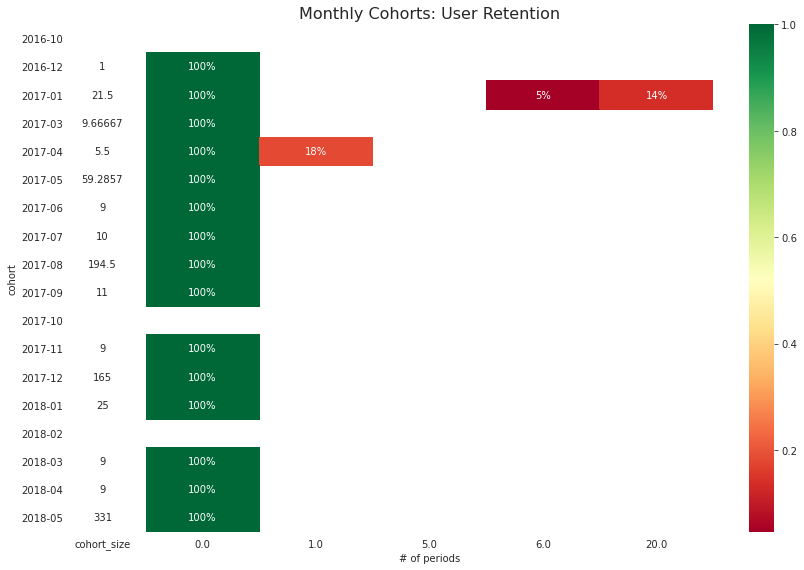

In [99]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

❓What do you notice? 

> On peut voir sur ce schéma que les clients commandent une fois le premier mois.

❓How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [101]:
df_more

,0
customer_unique_id,
004288347e5e88a27ded2bb23747066c,2
004b45ec5c64187465168251cd1c9c2f,2
00a39521eb40f7012db50455bf083460,2
00cc12a6d8b578b8ebd21ea4e2ae8b27,2
011575986092c30523ecb71ff10cb473,2
...,...
ff22e30958c13ffe219db7d711e8f564,2
ff44401d0d8f5b9c54a47374eb48c1b8,2
ff8892f7c26aa0446da53d01b18df463,2


❓Here is the code for the analysis of customers who have bought more than once : 

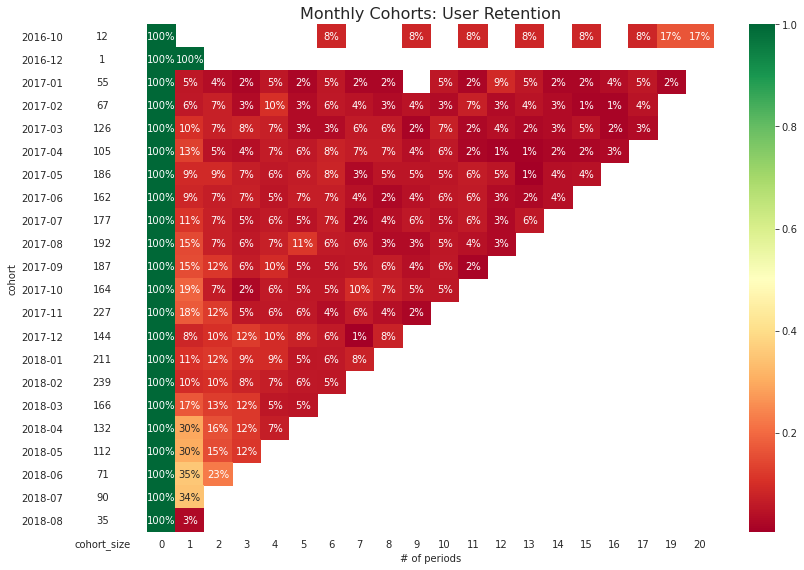

In [100]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

> La fidélisation de la clientèle est une mesure très utile pour comprendre combien de clients sont encore actifs. La fidélisation vous donne le pourcentage de clients actifs par rapport au nombre total de clients.

> Interprétation du tableau : 
Prenons l’exemple de la cohorte 2017-02, il y a 67 nouveaux clients. Sur ces 67 clients, il y a 100% qui commande pour la première fois en janvier. Sur ces 100%, 6% des clients sont revenus et ont acheté en février 2017, 7% en mars 2017 et ainsi de suite.